In [1]:
!pip install -e ..

import pandas as pd
from bokeh.io import output_notebook
output_notebook();

# set global plotting backend for pandas
pd.options.plotting.backend = "ms_matplotlib" # one of: "ms_bokeh" "ms_matplotlib" "ms_plotly"

df = pd.read_csv("../test/test_data/TestSpectrumDf.tsv", sep="\t")
df.head(3)

Obtaining file:///home/axel/dev/pyopenms-viz
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for pyopenms_viz (pyproject.toml) ... done
  Created wheel for pyopenms_viz: filename=pyopenms_viz-0.1.0-py3-none-any.whl size=2560 sha256=53dfc7219a370a5f5ffe7d1df2a71541f000bff57f036edcf93f4be02a09bedc
  Stored in directory: /tmp/pip-ephem-wheel-cache-r7qb9h44/wheels/2e/95/a9/fa41329d16e74ab68574ba6e891cc1f822b5413866bb5103aa
Successfully built pyopenms_viz
  Attempting uninstall: pyopenms_viz
    Found existing installation: pyopenms_viz 0.1.0
    Uninstalling pyopenms_viz-0.1.0:
      Successfully uninstalled pyopenms_viz-0.1.0


Loading BokehJS ...

,mz,intensity,ion_mobility,ion_annotation,ion_mobility_unit,precursor_mz,precursor_charge,native_id,spectrum,color_peak,custom_annotation,color_annotation,sequence
0,50.9890,10,2,a+,ms,221.08,1,spec_0,A,green,custom1,blue,DMAGCH
1,74.1324,20,4,b3+,ms,221.08,1,spec_0,A,green,custom2,blue,DMAGCH
2,100.5332,25,17,c5+,ms,221.08,1,spec_0,B,red,custom3,red,DMAGCH


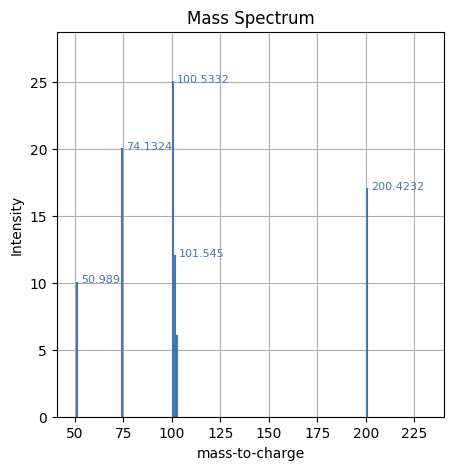

In [2]:
# default settings, top 5 intensity peaks are annotated with m/z
df.plot(x="mz", y="intensity", kind="spectrum")

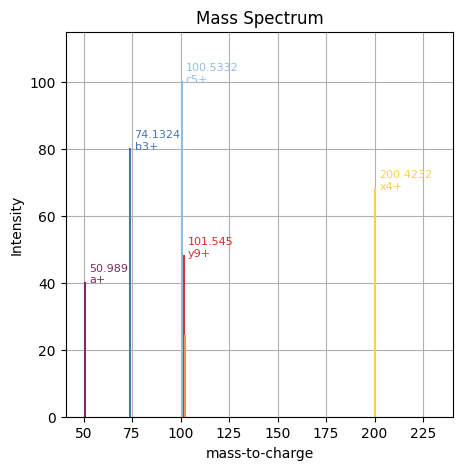

In [3]:
# ion annotations with default colors and relative intensite
df.plot(x="mz", y="intensity", kind="spectrum",
        ion_annotation="ion_annotation", relative_intensity=True)

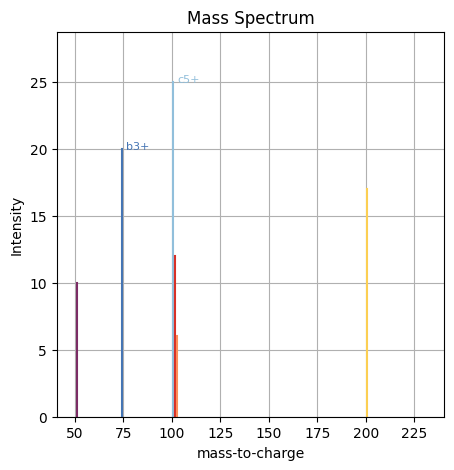

In [4]:
# annotating top 2 intensity peaks only and hiding m/z annotations(default is 5)
df.plot(x="mz", y="intensity", kind="spectrum",
        ion_annotation="ion_annotation", annotate_mz=False, annotate_top_n_peaks=2)

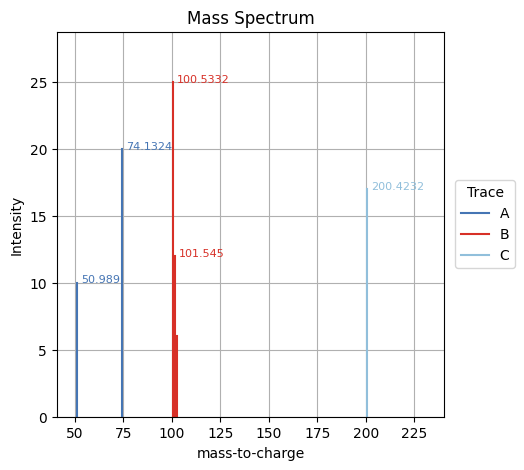

In [5]:
# grouping peaks, each group gets different color, show legend
df.plot(x="mz", y="intensity", kind="spectrum", by="spectrum")

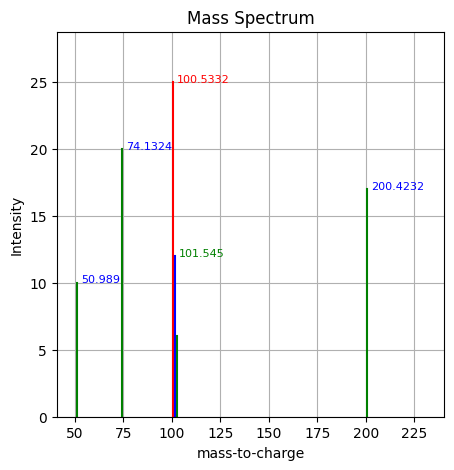

In [6]:
# custom annotation and peak colors based on columns in dataframe
df.plot(x="mz", y="intensity", kind="spectrum",
       annotation_color="color_annotation", peak_color="color_peak")

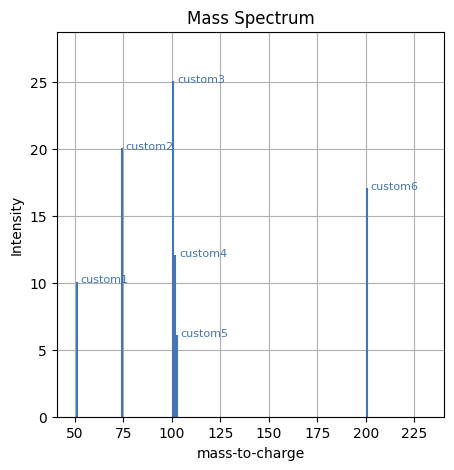

In [7]:
# custom annoation for all peaks without mz annotation
df.plot(x="mz", y="intensity", kind="spectrum",
       custom_annotation="custom_annotation", annotate_mz=False, annotate_top_n_peaks="all")

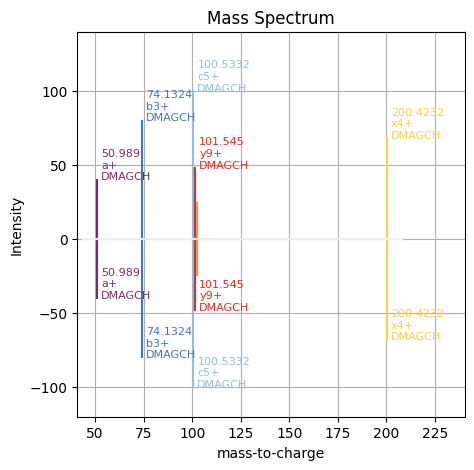

In [8]:
# mirror a reference spectrum with ion and sequence annoations
df.plot(x="mz", y="intensity", kind="spectrum",
        ion_annotation="ion_annotation", sequence_annotation="sequence",
        reference_spectrum=df, mirror_spectrum=True)